In [463]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from scipy.signal import get_window
import scipy.fftpack as fft
import noisereduce as nr

# preprocessing

In [464]:
# load
audio_file = "../Dataset/01.ha'/ha'_M2_11.wav"
# audio_file = "../Dataset/testing_rafi/rafi_Ha'.wav"
# audio_file = "../Dataset/Dataset_male/Ha'_M2_1.wav"
y , sr = librosa.load(audio_file, sr=44100)
print(y.shape, sr)
ipd.Audio(audio_file)

(472752,) 44100


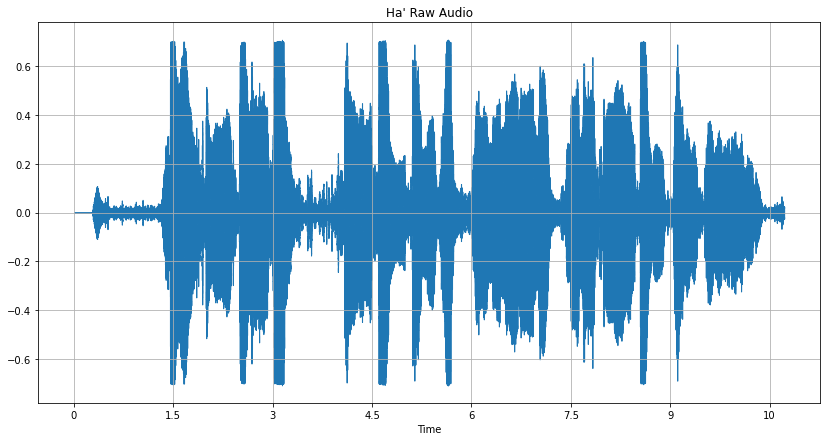

In [465]:
# plot waveform
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Ha\' Raw Audio')
plt.savefig("../new_hasil_gambar/ha'_raw_audio.png")
plt.show()

In [466]:
# preemphasis
y = librosa.effects.preemphasis(y, coef=0.97)
ipd.Audio(y, rate=sr)

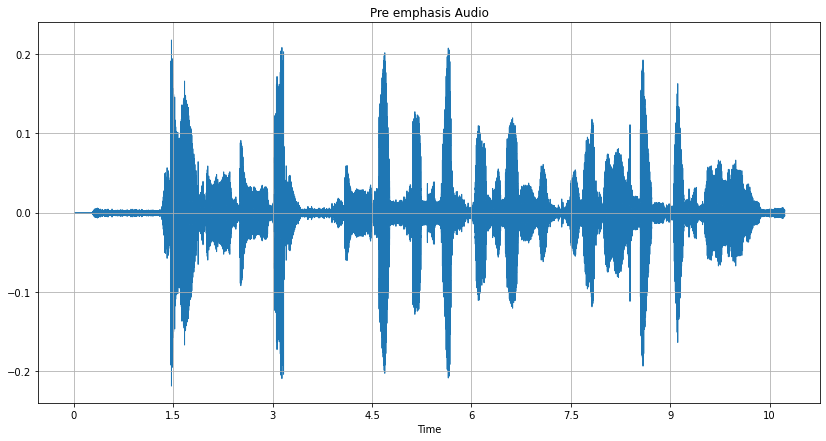

In [467]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Pre emphasis Audio')
plt.savefig('../new_hasil_gambar/pre-emphasis.png')
plt.show()

In [468]:
# normalisasi
y = y/np.max(np.abs(y))
ipd.Audio(y, rate=sr)

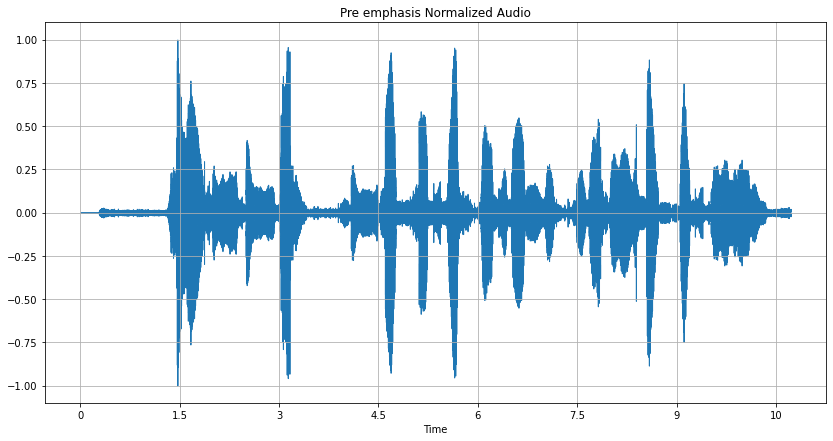

In [469]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Pre emphasis Normalized Audio')
plt.savefig('../new_hasil_gambar/normalized_audio.png')
plt.show()

In [470]:
def remove_silence(y):
     # Memisahkan audio menjadi bagian-bagian berdasarkan energi
    parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

    # Menggabungkan bagian-bagian yang tidak diam
    y_non_silent = []
    for start, end in parts:
        y_non_silent.extend(y[start:end])

    # Mengubah list menjadi array numpy
    y = np.array(y_non_silent)
    return y

In [471]:
y = remove_silence(y)
ipd.Audio(y, rate=sr)

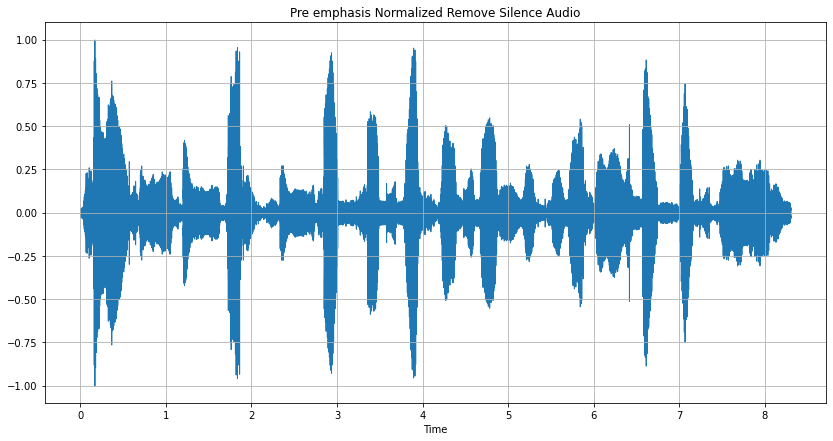

In [472]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Pre emphasis Normalized Remove Silence Audio')
plt.savefig('../new_hasil_gambar/remove_silence.png')
plt.show()

In [473]:
y = nr.reduce_noise(y, sr, prop_decrease=0.8)
ipd.Audio(y, rate=sr)

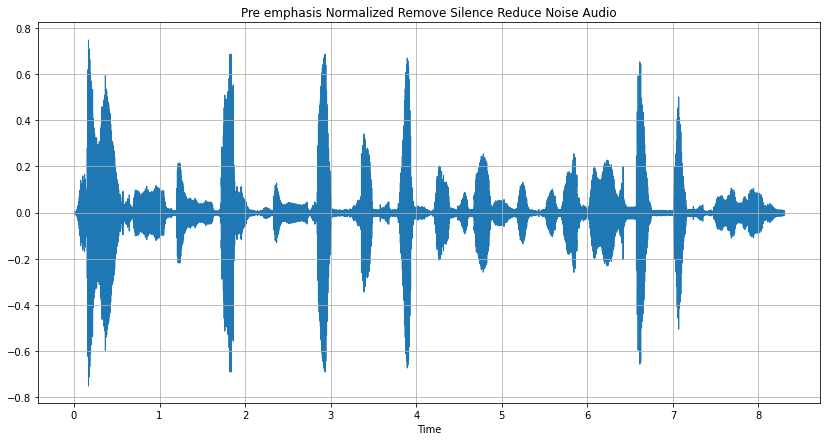

In [474]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.waveshow(y=y, sr=sr)
plt.grid(True)
plt.title('Pre emphasis Normalized Remove Silence Reduce Noise Audio')
plt.savefig('../new_hasil_gambar/reduce_noise.png')
plt.show()

# framing


In [475]:
# def frame_audio(audio, FFT_size=1024, hop_size=11, sample_rate=44100):
#     # hop_size in ms
    
#     audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
#     frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
#     frame_num = int((len(audio) - FFT_size) / frame_len) + 1
#     frames = np.zeros((frame_num,FFT_size))
    
#     for n in range(frame_num):
#         frames[n] = audio[n*frame_len:n*frame_len+FFT_size]
    
#     return frames

In [476]:
# hop_size = 10 #ms
FFT_size = 1024
index_frame = 20

In [477]:
# y = frame_audio(y, FFT_size=FFT_size, hop_size=hop_size, sample_rate=sr)

In [478]:
y = librosa.util.frame(y, frame_length=1024, hop_length=512)
y = y.T

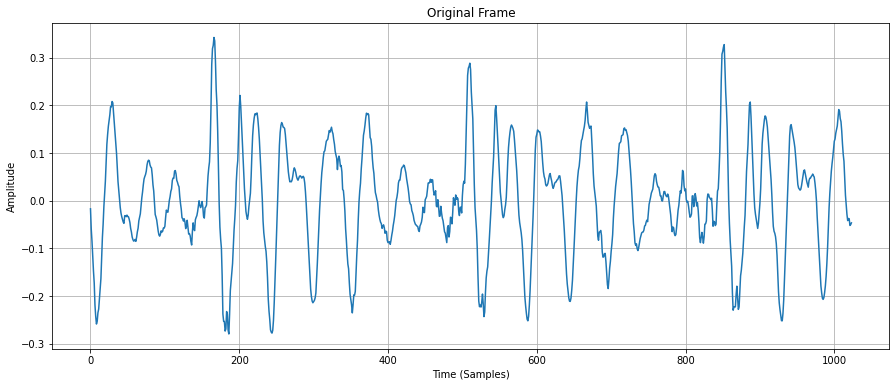

In [479]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(y[index_frame])
plt.title('Original Frame')
plt.xlabel('Time (Samples)')  # Menambah label sumbu x
plt.ylabel('Amplitude')  # Menambah label sumbu y
plt.grid(True)
plt.savefig('../new_hasil_gambar/original_frame.png')
plt.show()

# windowing

In [480]:
window = get_window('hamming', FFT_size, fftbins=True)

In [481]:
y = y * window

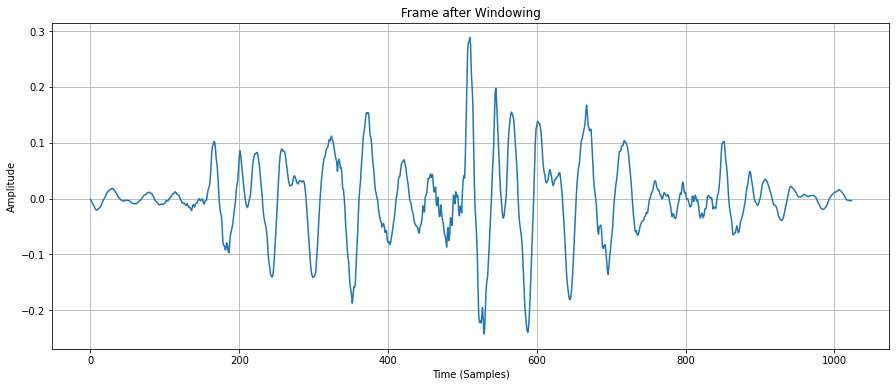

In [482]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(y[index_frame])
plt.title('Frame after Windowing')
plt.xlabel('Time (Samples)')  # Menambah label sumbu x
plt.ylabel('Amplitude')  # Menambah label sumbu y
plt.grid(True)
plt.savefig('../new_hasil_gambar/windowing_frame.png')
plt.show()

# FFT

In [483]:
audio_winT = np.transpose(y)

audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

In [484]:
y = np.square(np.abs(audio_fft))
freqs = np.fft.fftfreq(FFT_size, 1 / 44100)[:FFT_size//2+1]

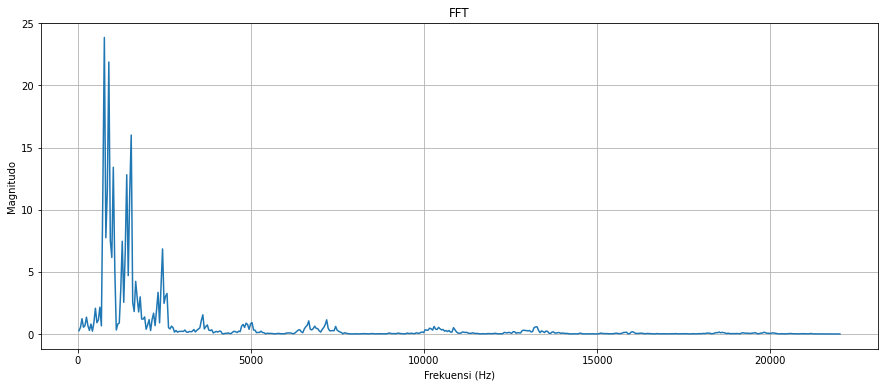

In [497]:
frame_fft = audio_fft[index_frame]
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('white')
plt.plot(freqs[freqs > 0], np.abs(frame_fft[:FFT_size//2 + 1])[freqs > 0])
plt.title('FFT')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Magnitudo')
plt.grid(True)
plt.savefig('../new_hasil_gambar/FFT.png')
plt.show()

# mel

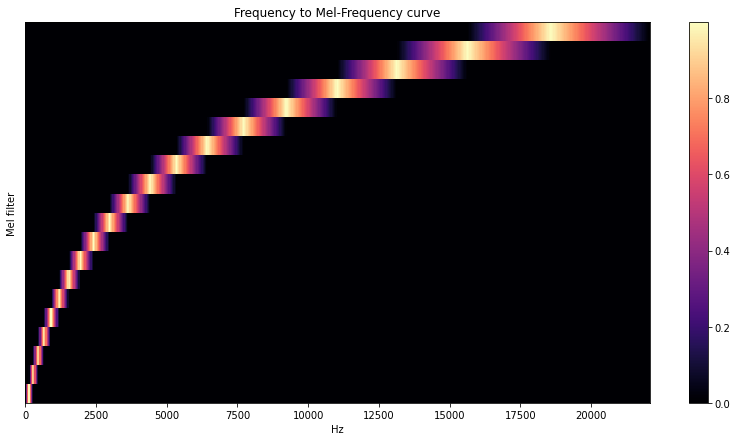

In [486]:
y_mel = y
mel = librosa.filters.mel(sr=44100, n_mels=20,n_fft=1024, htk=True, norm=None)
# S_db = librosa.power_to_db(S, ref=np.max)
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
librosa.display.specshow(mel, sr=sr, hop_length=512, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title("Frequency to Mel-Frequency curve")
plt.savefig('../new_hasil_gambar/mel_linear.png')
plt.show()

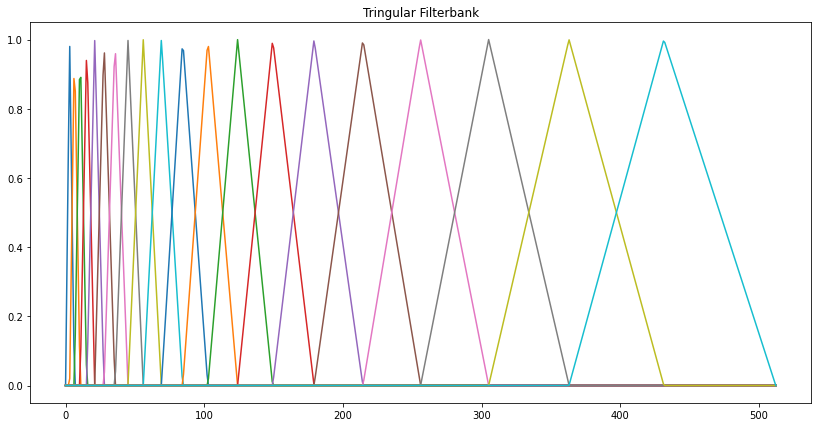

In [487]:
fig = plt.figure(figsize=(14,7))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.title("Tringular Filterbank")
plt.savefig('../new_hasil_gambar/Tringular Filterbank.png')
plt.show()

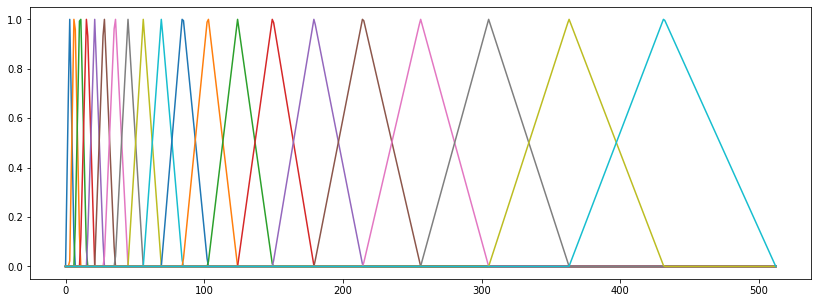

In [488]:
mel /= np.max(mel, axis=-1)[:, None]
fig = plt.figure(figsize=(14,5))
fig.patch.set_facecolor('white')
plt.plot(mel.T)
plt.show()

# VISUALISASI 

In [3]:
import librosa
import numpy as np
import noisereduce as nr
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter


def remove_silence(y):
     # Memisahkan audio menjadi bagian-bagian berdasarkan energi
    parts = librosa.effects.split(y, top_db=25, frame_length=1024, hop_length=512)

    # Menggabungkan bagian-bagian yang tidak diam
    y_non_silent = []
    for start, end in parts:
        y_non_silent.extend(y[start:end])

    # Mengubah list menjadi array numpy
    y = np.array(y_non_silent)
    return y

def preprocessing(audio):
    y , sr = librosa.load(audio, sr=44100)
    y = librosa.effects.preemphasis(y, coef=0.97)
    y = y/np.max(np.abs(y))
    y = remove_silence(y)
    y = nr.reduce_noise(y, sr, prop_decrease=0.8)
    # y = bandpass_filter(y, lowcut=100.0, highcut=3000.0, fs=sr, order=5)
    # y = shift_pitch_audio(y, sr)

    return y,sr

def extraction(audio):
    y , sr = preprocessing(audio)
    # y = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y,
                                 sr=sr,
                                 n_mfcc=13,
                                 window='hamming',
                                 win_length=1024,
                                 htk=False,
                                 hop_length=512,
                                 n_fft=1024,
                                 norm=None,
                                 dct_type=2,
                                 n_mels=20)
    # return = librosa.util.normalize(mfccs.T)
    return mfccs

Gambar 'Ha_Alt_M1.PNG' berhasil disimpan dengan judul 'Ha'Alt M1'.
Gambar 'Ha_Alt_M2.PNG' berhasil disimpan dengan judul 'Ha'Alt M2'.
Gambar 'Ha_Alt_M3.PNG' berhasil disimpan dengan judul 'Ha'Alt M3'.
Gambar 'Ha_Alt_M4.PNG' berhasil disimpan dengan judul 'Ha'Alt M4'.


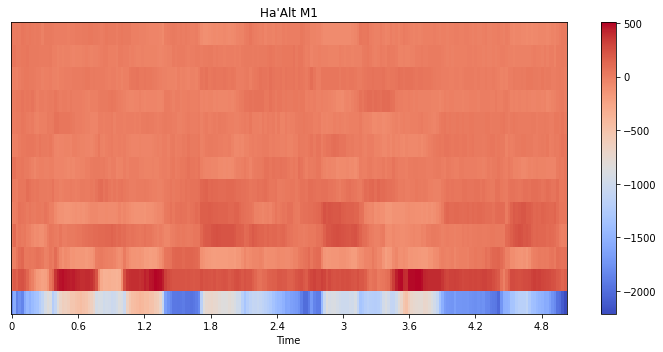

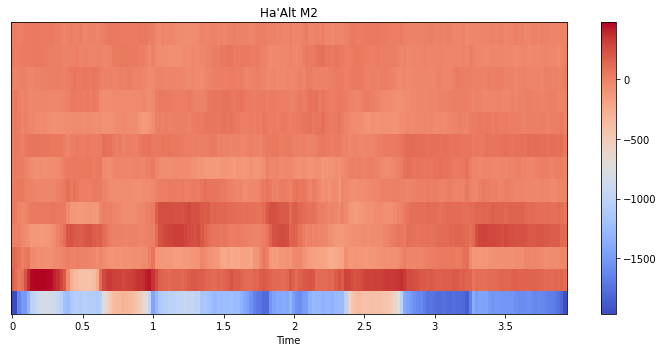

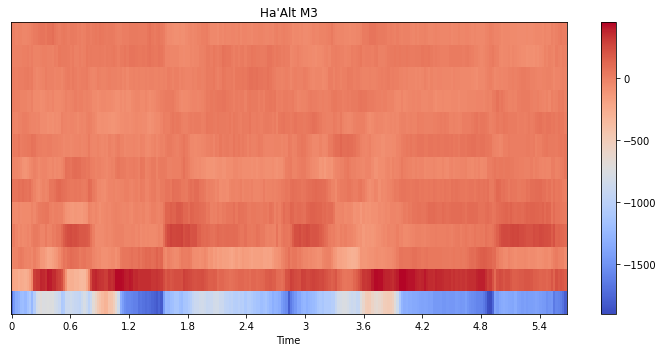

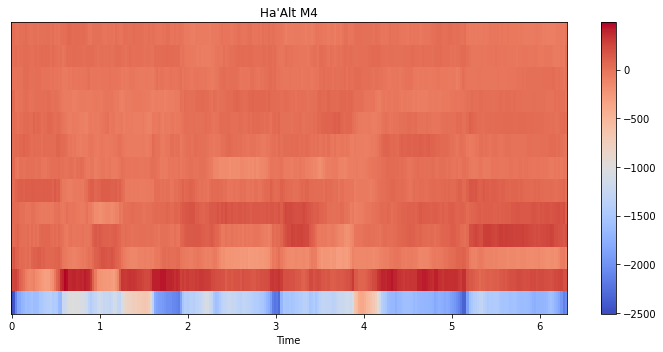

In [10]:
audio1 = "../Dataset_Alt/01.Ha\'_Alt/Ha\'_M1_Alt_11.wav"
audio2 = "../Dataset_Alt/01.Ha\'_Alt/Ha\'_M2_Alt_11.wav"
audio3 = "../Dataset_Alt/01.Ha\'_Alt/Ha\'_M3_Alt_1.wav"
audio4 = "../Dataset_Alt/01.Ha\'_Alt/Ha\'_M4_Alt_1.wav"

mfccs1 = extraction(audio1)
mfccs2 = extraction(audio2)
mfccs3 = extraction(audio3)
mfccs4 = extraction(audio4)

def save_mfcc_plot(mfccs, output_file, title):
    fig = plt.figure(figsize=(10,5))
    fig.patch.set_facecolor('white')
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(title)  # Judul sesuai dengan argumen title
    plt.tight_layout()
    plt.savefig(output_file)

# Definisikan path untuk menyimpan gambar
output_path = "../new_hasil_gambar"

# Ekstraksi MFCCs dan simpan gambar untuk setiap file audio
audio_files = [audio1, audio2, audio3, audio4]
for i, audio_file in enumerate(audio_files, start=1):
    mfccs = extraction(audio_file)
    output_file = f"Ha_Alt_M{i}.PNG"  # Ubah sesuai dengan format yang diinginkan
    title = f"Ha'Alt M{i}"  # Judul sesuai dengan contoh "Ha' M1" dan seterusnya
    save_mfcc_plot(mfccs, output_file, title)
    print(f"Gambar '{output_file}' berhasil disimpan dengan judul '{title}'.")